In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.mlab as mlab
%matplotlib inline

Gaussian Discriminant Analysis fits the problem best if the assumption, that the data we have has multivariate normal distribution - this way no other algorithm will give superior results. But if we are not confident - GDA is less prefered then, for example, logistic regression

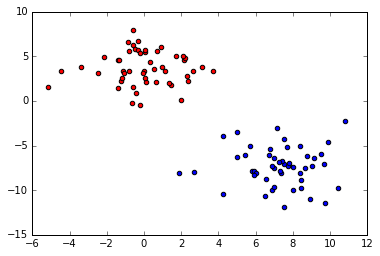

In [2]:
data, labels = make_blobs(centers=2, cluster_std=2)

data_max = data.max(axis=0)
data_min = data.min(axis=0)

plt.scatter(data[labels==0][:,0],data[labels==0][:,1], c='r')
plt.scatter(data[labels==1][:,0],data[labels==1][:,1], c='b')
plt.show()

In [3]:
class MultivarNorm():
    def __init__(self,mean,CovMatr):
        self.m = mean
        self.Cov = np.matrix(CovMatr)
        self.n_dim = CovMatr.shape[0]
        self.det = np.linalg.det(CovMatr)

    
    def probability(self,x):
        return 1./(np.power(2*np.pi, self.n_dim/2.)*np.sqrt(self.det))\
                *np.exp(-0.5*(x-self.m).T.dot( np.linalg.inv(self.Cov) ).dot(x-self.m) )

class GDA():
    def __init__(self, num_clusters=2):
        self.n_clusters = num_clusters
    
    def fit(self,data,labels):
        m_data = data.reshape(data.shape[0],data.shape[1],1)
        self.fi = np.mean(labels == 1)
        self.m = [ m_data[labels == i].mean(axis=0) for i in range(self.n_clusters) ]
        
        s = lambda i: np.dot((m_data[i] - self.m[labels[i]]), (m_data[i] - self.m[labels[i]]).T)
        self.sigm = 1./len(labels)*np.sum(map(s,range(len(labels))),axis=0)
        
        self.normals = [MultivarNorm(m,self.sigm) for m in self.m]
        
    def predict(self,x):
        if x.size != x.shape[0]:
            tmp = x.reshape(x.shape[0],x.shape[1],1)
            return [np.argmax([n.probability(x) for n in self.normals]) for x in tmp]
        else:
            tmp = x.reshape(x.size,1)
            return np.argmax([n.probability(x) for n in self.normals])

In [4]:
a = GDA()
a.fit(data,labels)

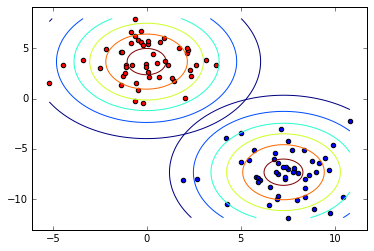

In [5]:
x = np.linspace(data_min[0], data_max[0], num=100)
y = np.linspace(data_min[1], data_max[1], num=100)
X, Y = np.meshgrid(x, y)

Z = mlab.bivariate_normal(X, Y, a.sigm[0][0], a.sigm[1][1] , a.m[0][0], a.m[0][1], a.sigm[0][1])
Z2 = mlab.bivariate_normal(X, Y, a.sigm[0][0], a.sigm[1][1] , a.m[1][0], a.m[1][1], a.sigm[0][1])


# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.contour(X, Y, Z)
plt.contour(X,Y,Z2)
plt.scatter(data[labels==0][:,0],data[labels==0][:,1], c='r')
plt.scatter(data[labels==1][:,0],data[labels==1][:,1], c='b')
# plt.clabel(CS, inline=1, fontsize=10)